# Project - Anomaly detection on CPU usage 

- Anomaly Detection means to identify unexpected events in a process. It means to detect threats to our systems that may cause harm in terms of security and leakage of important information, but the importance of Anomaly Detection is not limited to security. 
- The data of this project is based on per-minute metrics of the host’s CPU utilization.
 

In [1]:
!pip install -r '../requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 117.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 124.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 152.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 122.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 kB 121.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 127.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 157.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 163.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 40.5 MB/s eta 0:00:0000

## Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt


## Load Data

In [3]:
#download from https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/

train_dataA = pd.read_csv('../data/raw/cpu-train-a.csv')
test_dataA = pd.read_csv('../data/raw/cpu-test-a.csv')

In [4]:
train_dataB = pd.read_csv('../data/raw/cpu-train-b.csv')
test_dataB = pd.read_csv('../data/raw/cpu-test-b.csv')

In [5]:
print('Shape A: ', train_dataA.shape)
print('Shape B: ', train_dataB.shape)

Shape A:  (420, 2)
Shape B:  (600, 2)


In [6]:
print('Shape A: ', test_dataA.shape)
print('Shape B: ', test_dataB.shape)

Shape A:  (60, 2)
Shape B:  (60, 2)


In [7]:
train_dataA.head(10)

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08
5,2017-01-27 18:47:00,1.08
6,2017-01-27 18:48:00,1.15
7,2017-01-27 18:49:00,1.13
8,2017-01-27 18:50:00,1.09
9,2017-01-27 18:51:00,1.06


In [8]:
train_dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [9]:
train_dataB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


## Explorer Train_Data_A

In [10]:
#Convert the dataframe index to a datetime index 
df_raw_A = train_dataA.copy()
df_raw_A['date'] = pd.to_datetime(df_raw_A['datetime'])
df_raw_A = df_raw_A.set_index('date')
df_raw_A.drop(['datetime'], axis=1, inplace=True)

#Convert the dataframe index to a datetime index 
df_test_A = test_dataA.copy()
df_test_A['date'] = pd.to_datetime(df_test_A['datetime'])
df_test_A = df_test_A.set_index('date')
df_test_A.drop(['datetime'], axis=1, inplace=True) 

df_raw_A.head()

,cpu
date,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [12]:
df_raw_A.resample('D').mean()

,cpu
date,
2017-01-27,1.142579
2017-01-28,1.515980


In [11]:
df_test_A.resample('D').mean()

,cpu
date,
2017-01-28,1.2715


In [12]:
#2 day data, 1 min interval

<AxesSubplot:title={'center':'CPU 27-28 jun 2017'}, xlabel='date'>

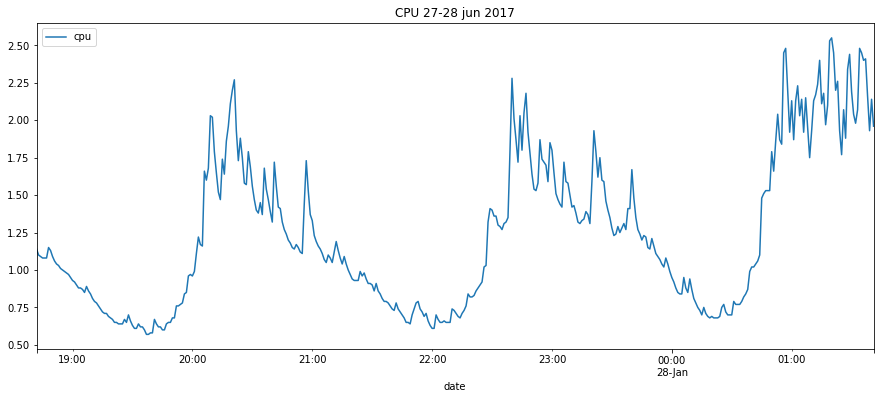

In [13]:
df_raw_A.plot(title="CPU 27-28 jun 2017", figsize=(15,6))

- Visualize a cycle of 120 minute aprox.

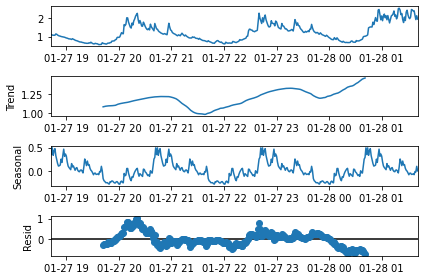

In [14]:
#rcParams['figure.figsize'] = 11, 9
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_raw_A,model='additive',period=120) # 2 hours period, the datetime is in minutes
fig = decomposition.plot()
plt.show()

## Model ARIMA Train_A

In [15]:
from pmdarima.arima import auto_arima
 

In [17]:
stepwise_model_A = auto_arima(df_raw_A, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_A.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=2.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=2.70 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.41 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.31 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=2.08 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.90 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.3

In [18]:
# Train the model
stepwise_model_A.fit(df_raw_A)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

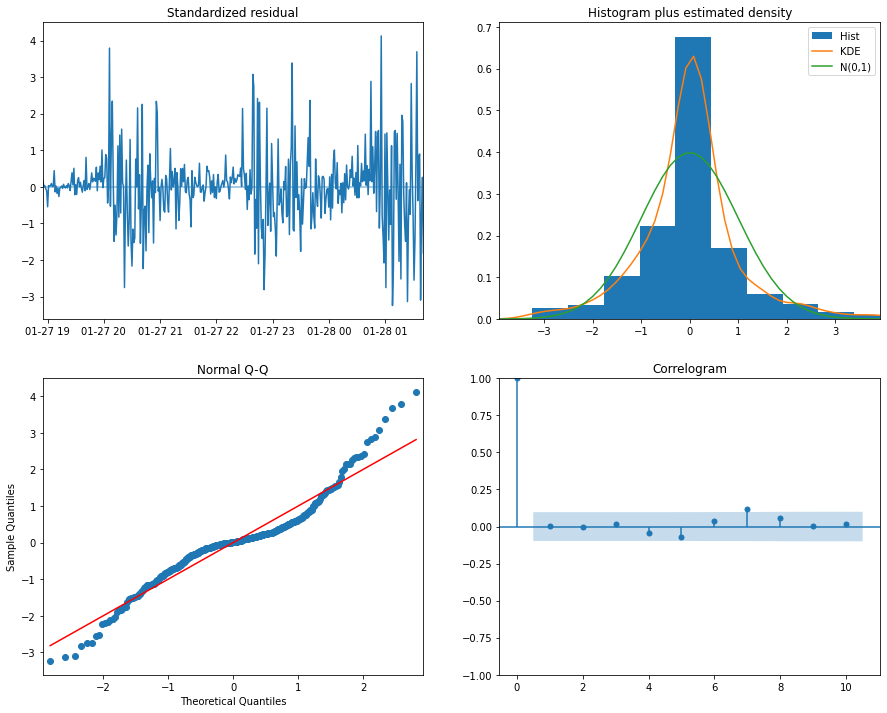

In [20]:
#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
stepwise_model_A.fit(df_raw_A).plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:xlabel='date'>

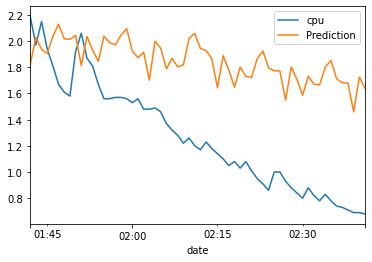

In [21]:
future_forecast = stepwise_model_A.predict(n_periods=60)

future_forecast = pd.DataFrame(future_forecast,index = df_test_A.index,columns=['Prediction'])
pd.concat([df_test_A,future_forecast],axis=1).plot()

## Explorer Train_Data_B

In [23]:
#Convert the dataframe index to a datetime index 
df_raw_B = train_dataB.copy()
df_raw_B['date'] = pd.to_datetime(df_raw_B['datetime'])
df_raw_B = df_raw_B.set_index('date')
df_raw_B.drop(['datetime'], axis=1, inplace=True)

#Convert the dataframe index to a datetime index 
df_test_B = test_dataB.copy()
df_test_B['date'] = pd.to_datetime(df_test_B['datetime'])
df_test_B = df_test_B.set_index('date')
df_test_B.drop(['datetime'], axis=1, inplace=True) 

df_raw_B.head()

,cpu
date,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [24]:
df_raw_B.resample('D').mean()

,cpu
date,
2017-01-27,1.142579
2017-01-28,1.440780


In [25]:
df_test_B.resample('D').mean()

,cpu
date,
2017-01-28,1.345833


<AxesSubplot:title={'center':'CPU 27-28 jun 2017'}, xlabel='date'>

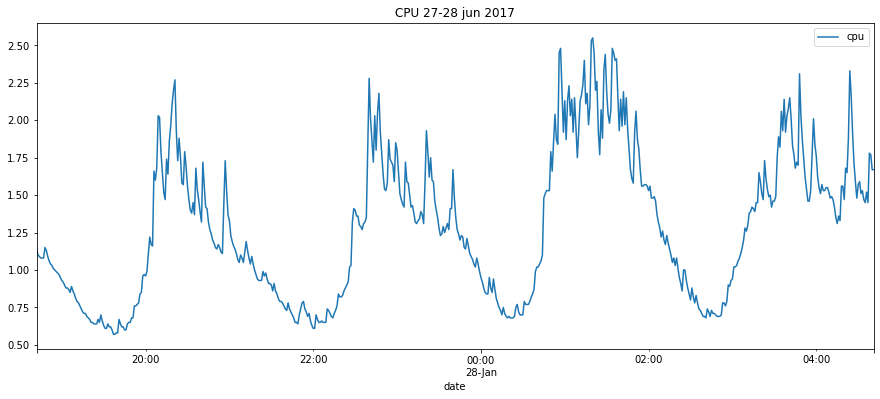

In [26]:
df_raw_B.plot(title="CPU 27-28 jun 2017", figsize=(15,6))

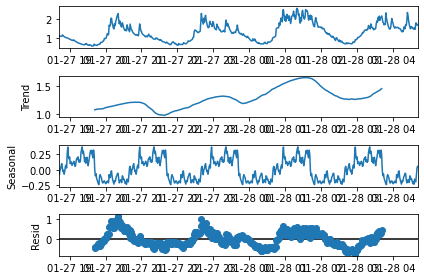

In [27]:
#rcParams['figure.figsize'] = 11, 9
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_raw_B,model='additive',period=120) # 2 hours period, the datetime is in minutes
fig = decomposition.plot()
plt.show()

## Model ARIMA Train_B

In [28]:
stepwise_model_B = auto_arima(df_raw_B, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_B.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=4.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=2.64 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.78 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=12.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=2.60 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=14.91 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729

In [29]:
# Train the model
stepwise_model_B.fit(df_raw_B)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

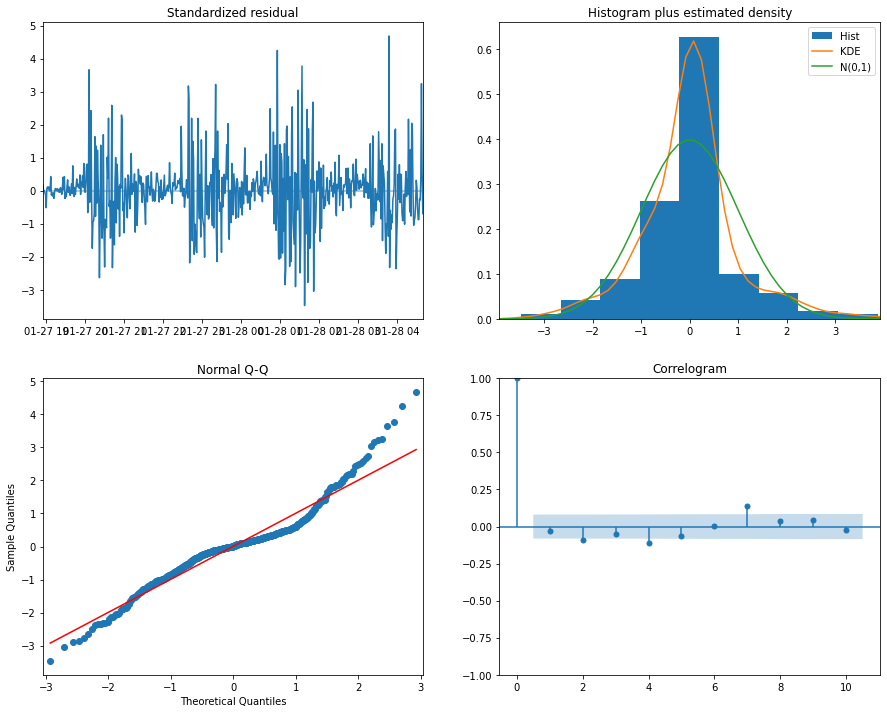

In [30]:
#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
stepwise_model_B.fit(df_raw_B).plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:xlabel='date'>

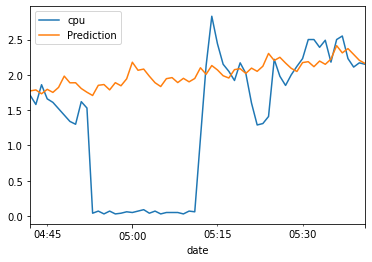

In [32]:
future_forecast = stepwise_model_B.predict(n_periods=120)

future_forecast = pd.DataFrame(future_forecast,index = df_test_B.index,columns=['Prediction'])
pd.concat([df_test_B,future_forecast],axis=1).plot()